In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from kmeans import *
from tf_idf import tf_idf,write_back
from data import *
import pandas as pd
import numpy as np
from rfm import *

In [2]:
df = load_data()

# Evaluate the best number of Cluster

In [3]:
matrix = tf_idf(df)

In [4]:
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.06539
Clusters = 3 ,Silhouette Score = 0.0973
Clusters = 4 ,Silhouette Score = 0.12028
Clusters = 5 ,Silhouette Score = 0.13913
Clusters = 6 ,Silhouette Score = 0.14752
Clusters = 7 ,Silhouette Score = 0.12231
Clusters = 8 ,Silhouette Score = 0.13337
Clusters = 9 ,Silhouette Score = 0.12481
Clusters = 10 ,Silhouette Score = 0.06451
Clusters = 11 ,Silhouette Score = 0.0798
Clusters = 12 ,Silhouette Score = 0.04604
Clusters = 13 ,Silhouette Score = 0.05754
Clusters = 14 ,Silhouette Score = 0.05292


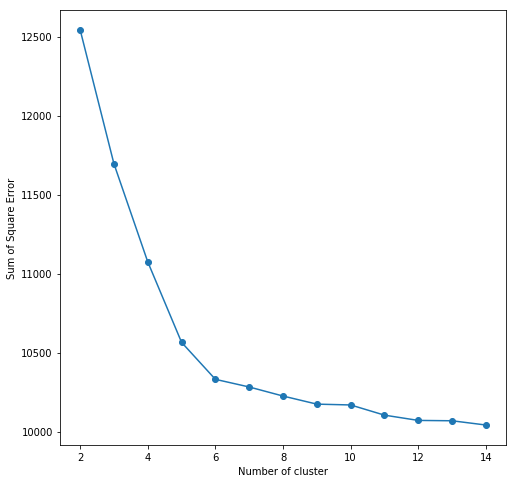

In [5]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [6]:
clusters = kmeans(matrix = matrix, cluster_num = 6, score = sscore[6] )

In [7]:
def silhouette_graph(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

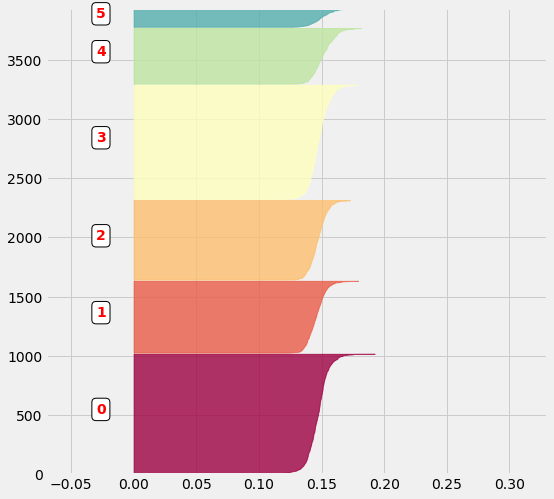

In [8]:
# Plot Silhouette graph
sample_silhouette_values = silhouette_samples(matrix, clusters)
silhouette_graph(6, [-0.07, 0.33], len(matrix), sample_silhouette_values, clusters)

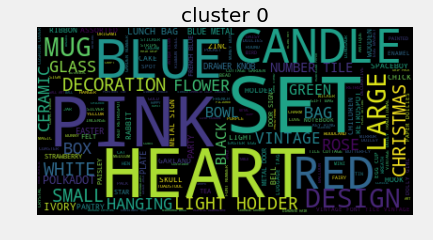

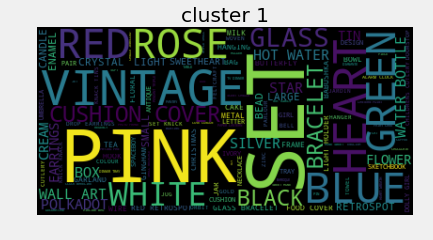

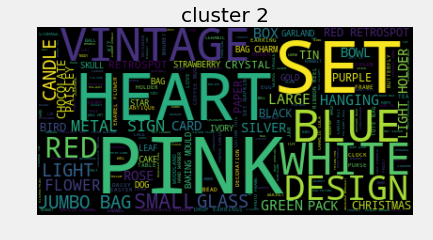

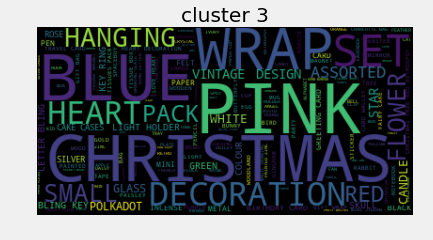

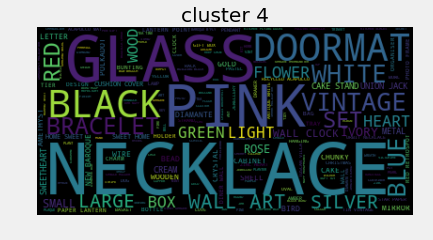

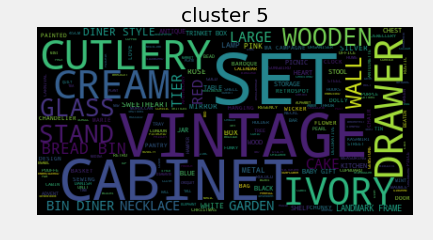

In [9]:
# Plot word cloud
d_list = df['Description'].unique().tolist()
prod_cluster = defaultdict(list)
for i in range(len(clusters)):
    cluster_num = clusters[i]
    prod_cluster[cluster_num].append(d_list[i])
for i in range(len(prod_cluster)):
    s = " "
    words = s.join(prod_cluster[i])
    wordcloud = WordCloud().generate(text = words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('cluster {}'.format(i))
    plt.show()

In [10]:
df = write_back(df,clusters)

In [22]:
tf_idf_rfm = rfm(df,1)
tf_idf_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_0,cate_1,cate_2,cate_3,cate_4,cate_5
0,17850,34,372,5391.21,594.12,1878.04,1048.50,0.00,1262.80,607.75
1,13047,9,56,3232.59,494.78,956.90,536.48,277.18,826.45,140.80
2,12583,15,2,6705.38,1532.50,2082.10,1166.40,1448.88,245.25,230.25
3,13748,5,95,948.25,147.00,48.20,577.32,52.68,29.40,93.65
4,15100,3,333,876.00,0.00,0.00,0.00,0.00,0.00,876.00
5,15291,14,25,4623.30,978.46,784.60,500.76,207.48,1972.95,179.05
6,14688,21,7,5579.10,1140.47,964.60,2120.08,900.10,428.85,25.00
7,17809,12,16,5411.91,1232.89,1425.49,783.00,127.38,1843.15,0.00
8,15311,91,0,60632.75,18800.67,5879.91,22712.55,4780.97,7703.65,755.00
9,16098,7,87,2005.63,93.30,404.00,551.96,45.67,382.50,528.20


In [23]:
tf_idf_rfm = tf_idf_rfm.drop(['Amount'], axis=1)

In [24]:
tf_idf_rfm.iloc[:,1:] = norm(tf_idf_rfm.iloc[:,1:])
tf_idf_rfm.head(10)

,CustomerID,Frequency,Recency,cate_0,cate_1,cate_2,cate_3,cate_4,cate_5
0,17850,0.160976,0.997319,0.006100,0.044882,0.015152,0.000000,0.008306,0.015340
1,13047,0.039024,0.150134,0.005080,0.022868,0.007753,0.008139,0.005436,0.003554
2,12583,0.068293,0.005362,0.015735,0.049759,0.016855,0.042542,0.001613,0.005812
3,13748,0.019512,0.254692,0.001509,0.001152,0.008343,0.001547,0.000193,0.002364
4,15100,0.009756,0.892761,0.000000,0.000000,0.000000,0.000000,0.000000,0.022110
5,15291,0.063415,0.067024,0.010046,0.018751,0.007236,0.006092,0.012976,0.004519
6,14688,0.097561,0.018767,0.011710,0.023052,0.030637,0.026429,0.002821,0.000631
7,17809,0.053659,0.042895,0.012659,0.034067,0.011315,0.003740,0.012123,0.000000
8,15311,0.439024,0.000000,0.193034,0.140521,0.328213,0.140378,0.050668,0.019056
9,16098,0.029268,0.233244,0.000958,0.009655,0.007976,0.001341,0.002516,0.013332


In [27]:
matrix = tf_idf_rfm.iloc[:,1:]
matrix.head(10)

,Frequency,Recency,cate_0,cate_1,cate_2,cate_3,cate_4,cate_5
0,0.160976,0.997319,0.006100,0.044882,0.015152,0.000000,0.008306,0.015340
1,0.039024,0.150134,0.005080,0.022868,0.007753,0.008139,0.005436,0.003554
2,0.068293,0.005362,0.015735,0.049759,0.016855,0.042542,0.001613,0.005812
3,0.019512,0.254692,0.001509,0.001152,0.008343,0.001547,0.000193,0.002364
4,0.009756,0.892761,0.000000,0.000000,0.000000,0.000000,0.000000,0.022110
5,0.063415,0.067024,0.010046,0.018751,0.007236,0.006092,0.012976,0.004519
6,0.097561,0.018767,0.011710,0.023052,0.030637,0.026429,0.002821,0.000631
7,0.053659,0.042895,0.012659,0.034067,0.011315,0.003740,0.012123,0.000000
8,0.439024,0.000000,0.193034,0.140521,0.328213,0.140378,0.050668,0.019056
9,0.029268,0.233244,0.000958,0.009655,0.007976,0.001341,0.002516,0.013332
